Predict the amount of insurance claim given the number of claims

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
df=pd.read_excel('slr06.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [60]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [61]:
## Check for nulls 
df.isnull().values.any()

False

In [14]:
#Profiling data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


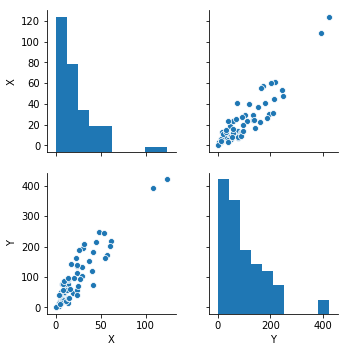

In [10]:
## check for outliers

sns.pairplot(df)

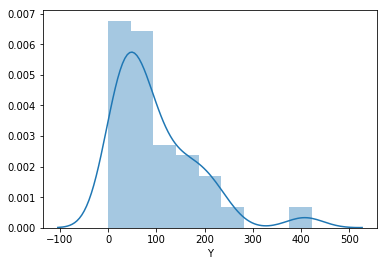

In [11]:
sns.distplot(df['Y'])

In [62]:
# Train Test split

from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(df[['X']],df[['Y']],test_size=0.3,random_state=101)



In [63]:
# Model Creation

from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

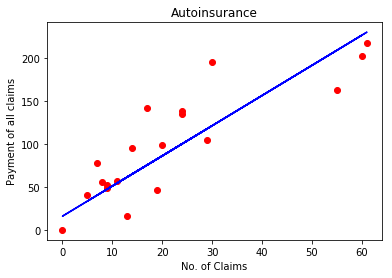

In [25]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,lm.predict(X_test),color='blue')
plt.title('Autoinsurance')
plt.xlabel('No. of Claims')
plt.ylabel('Payment of all claims')
plt.show()

In [26]:
# Model Evaluation

from sklearn import metrics 
print('Absolute mean error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))

Absolute mean error: 26.990800906341814
Mean Squared error: 1147.8378251173554


In [34]:
from sklearn.metrics import r2_score
print("R score: ", r2_score(y_test,y_pred))

R score:  0.7070303069882939


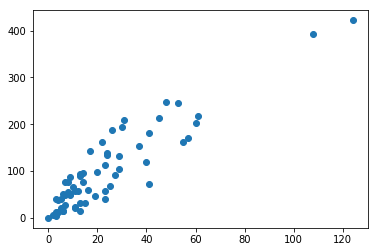

In [52]:
## Plot to check the outlier

plt.scatter(df['X'],df['Y'])

In [35]:
## score after Treating Outliers 

df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [36]:
IQR = 140.000000-38.850000


In [37]:
UB = 140.000000 + IQR*1.5
LB = 38.850000 - IQR*1.5

In [38]:
print("UB:", UB)
print("LB:", LB)

UB: 291.725
LB: -112.87500000000003


In [49]:
df.shape

(63, 2)

In [50]:
df1=df[~(df['Y'] > 291.725) | (df['Y'] < -112.87500000000003) ]

In [51]:
df1.shape

(61, 2)

In [53]:
# removed the data with outlier in new df = df1

# Train Test split

from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(df1[['X']],df1[['Y']],test_size=0.3,random_state=101)


In [54]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

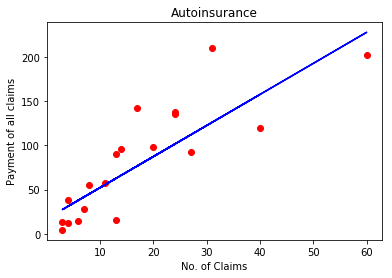

In [55]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,lm.predict(X_test),color='blue')
plt.title('Autoinsurance')
plt.xlabel('No. of Claims')
plt.ylabel('Payment of all claims')
plt.show()

In [56]:
from sklearn import metrics 
print('Absolute mean error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))

Absolute mean error: 27.867245842110822
Mean Squared error: 1167.6493589619258


In [57]:
from sklearn.metrics import r2_score
print("R score: ", r2_score(y_test,y_pred))

R score:  0.696670650224301


In [64]:
ypred=pd.DataFrame(data=y_pred,columns=['Predicted'])
id = pd.DataFrame(data=X_test.index.values,columns=['ID'])
output=pd.concat([id,ypred],axis=1)
output.to_csv('CaseStudy1_2_session19.csv',index=False)